In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
!git pull origin master

From https://github.com/moribello/COVID_visualizations
 * branch            master     -> FETCH_HEAD
Already up to date.


In [2]:
def import_data():
    """Imports data from three different .csv lists. The lists for time_series data is updated automatically via
    GitHub so need to be in those specific directories. The state_population file should be in the same directory
    as this python file"""
    time_series1 = pd.DataFrame(pd.read_csv("/Users/mo/Documents/Python/csse-COVID19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"))
    time_series2 = pd.DataFrame(pd.read_csv("/Users/mo/Documents/Python/csse-COVID19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"))
    stpop = pd.DataFrame(pd.read_csv("state_population.csv"))
    countpop = pd.DataFrame(pd.read_csv("mass_county_pop.csv"))
    return time_series1, countpop

In [26]:
def tick_dates(time_series):
    """Creates tick labels based on start, end, and in between values by finding the start and end 
    column headers, converting them to date / time, calculating the remaining three quintiles, and converting
    these five values to short month and month date. It depends on the 11th column (index place 12) being in a 
    m/d/yr format."""
    start_date = datetime.strptime(time_series.columns[12], '%m/%d/%y').date()
    tick1 = start_date.strftime("%b %d")
    end_date = datetime.strptime(time_series.columns[-1], '%m/%d/%y').date()
    tick5 = end_date.strftime("%b %d")
    mid_date = start_date + (end_date - start_date)/2
    tick3 = mid_date.strftime("%b %d")
    tick2 = (start_date + (mid_date - start_date)/2).strftime("%b %d")
    tick4 = (mid_date + (end_date - mid_date)/2).strftime("%b %d")
    return (tick1, tick2, tick3, tick4, tick5)

In [27]:
def plot_ma_counties(time_series1, countpop):
    """Creates a comparison of each county in Massachusett 
    tick data on the x axis is created via the tick_dates() function. """
    (tick1, tick2, tick3, tick4, tick5) = tick_dates(time_series1)
    countpop = pd.DataFrame(pd.read_csv("mass_county_pop.csv"))
    county1 = time_series1[(time_series1['Province_State'] == 'Massachusetts') & (time_series1['Admin2'] == 'Barnstable')].sum().values[12:] / countpop[countpop['County'] == 'Barnstable'].values[0][1]
    county2 = time_series1[(time_series1['Province_State'] == 'Massachusetts') & (time_series1['Admin2'] == 'Berkshire')].sum().values[12:] / countpop[countpop['County'] == 'Berkshire'].values[0][1]
    county3 = time_series1[(time_series1['Province_State'] == 'Massachusetts') & (time_series1['Admin2'] == 'Bristol')].sum().values[12:] / countpop[countpop['County'] == 'Bristol'].values[0][1]
    county4 = time_series1[(time_series1['Province_State'] == 'Massachusetts') & (time_series1['Admin2'] == 'Dukes')].sum().values[12:] / countpop.at[3, 'Population']
    county5 = time_series1[(time_series1['Province_State'] == 'Massachusetts') & (time_series1['Admin2'] == 'Essex')].sum().values[12:] / countpop.at[4, 'Population']
    county6 = time_series1[(time_series1['Province_State'] == 'Massachusetts') & (time_series1['Admin2'] == 'Franklin')].sum().values[12:] / countpop.at[5, 'Population']
    county7 = time_series1[(time_series1['Province_State'] == 'Massachusetts') & (time_series1['Admin2'] == 'Hampden')].sum().values[12:] / countpop.at[6, 'Population']
    county8 = time_series1[(time_series1['Province_State'] == 'Massachusetts') & (time_series1['Admin2'] == 'Hampshire')].sum().values[12:] / countpop.at[7, 'Population']
    county9 = time_series1[(time_series1['Province_State'] == 'Massachusetts') & (time_series1['Admin2'] == 'Middlesex')].sum().values[12:] / countpop.at[8, 'Population']
    county10 = time_series1[(time_series1['Province_State'] == 'Massachusetts') & (time_series1['Admin2'] == 'Nantucket')].sum().values[12:] / countpop.at[9, 'Population']
    county11 = time_series1[(time_series1['Province_State'] == 'Massachusetts') & (time_series1['Admin2'] == 'Norfolk')].sum().values[12:] / countpop.at[10, 'Population']
    county12 = time_series1[(time_series1['Province_State'] == 'Massachusetts') & (time_series1['Admin2'] == 'Plymouth')].sum().values[12:] / countpop.at[11, 'Population']
    county13 = time_series1[(time_series1['Province_State'] == 'Massachusetts') & (time_series1['Admin2'] == 'Suffolk')].sum().values[12:] / countpop.at[12, 'Population']
    county14 = time_series1[(time_series1['Province_State'] == 'Massachusetts') & (time_series1['Admin2'] == 'Worcester')].sum().values[12:] / countpop.at[13, 'Population']
    state = time_series1[time_series1['Province_State'] == 'Massachusetts'].sum().values[12:] / 6500000

    plt.figure(figsize=(15,7))
    plt.plot(county1, label = 'Barnstable')
    plt.plot(county2, label = 'Berkshire')
    plt.plot(county3, label = 'Bristol')
    plt.plot(county4, label = 'Dukes')
    plt.plot(county5, label = 'Essex')
    plt.plot(county6, label = 'Franklin')
    plt.plot(county7, label = 'Hampden')
    plt.plot(county8, label = 'Hampshire')
    plt.plot(county9, label = 'Middlesex')
    plt.plot(county10, label = 'Nantucket')
    plt.plot(county11, label = 'Norfolk')
    plt.plot(county12, label = 'Plymouth')
    plt.plot(county13, label = 'Suffolk')
    plt.plot(county14, label = 'Worcester')
 #   plt.plot(state, color='red', label = 'State')
    plt.grid()
    plt.title("Confirmed COVID-19 Cases per Capita \nby Massachusetts County")
    plt.legend()
    plt.xticks([0, 25, 50, 75, 100], [tick1, tick2, tick3, tick4, tick5]);

In [28]:
def plot_ma_counties_raw(time_series1, countpop):
    """Creates a comparison of each county in Massachusett 
    tick data on the x axis is created via the tick_dates() function. """
    (tick1, tick2, tick3, tick4, tick5) = tick_dates(time_series1)
    countpop = pd.DataFrame(pd.read_csv("mass_county_pop.csv"))
    county1 = time_series1[(time_series1['Province_State'] == 'Massachusetts') & (time_series1['Admin2'] == 'Barnstable')].sum().values[12:] 
    county2 = time_series1[(time_series1['Province_State'] == 'Massachusetts') & (time_series1['Admin2'] == 'Berkshire')].sum().values[12:] 
    county3 = time_series1[(time_series1['Province_State'] == 'Massachusetts') & (time_series1['Admin2'] == 'Bristol')].sum().values[12:] 
    county4 = time_series1[(time_series1['Province_State'] == 'Massachusetts') & (time_series1['Admin2'] == 'Dukes')].sum().values[12:] 
    county5 = time_series1[(time_series1['Province_State'] == 'Massachusetts') & (time_series1['Admin2'] == 'Essex')].sum().values[12:] 
    county6 = time_series1[(time_series1['Province_State'] == 'Massachusetts') & (time_series1['Admin2'] == 'Franklin')].sum().values[12:] 
    county7 = time_series1[(time_series1['Province_State'] == 'Massachusetts') & (time_series1['Admin2'] == 'Hampden')].sum().values[12:] 
    county8 = time_series1[(time_series1['Province_State'] == 'Massachusetts') & (time_series1['Admin2'] == 'Hampshire')].sum().values[12:] 
    county9 = time_series1[(time_series1['Province_State'] == 'Massachusetts') & (time_series1['Admin2'] == 'Middlesex')].sum().values[12:] 
    county10 = time_series1[(time_series1['Province_State'] == 'Massachusetts') & (time_series1['Admin2'] == 'Nantucket')].sum().values[12:] 
    county11 = time_series1[(time_series1['Province_State'] == 'Massachusetts') & (time_series1['Admin2'] == 'Norfolk')].sum().values[12:]
    county12 = time_series1[(time_series1['Province_State'] == 'Massachusetts') & (time_series1['Admin2'] == 'Plymouth')].sum().values[12:]
    county13 = time_series1[(time_series1['Province_State'] == 'Massachusetts') & (time_series1['Admin2'] == 'Suffolk')].sum().values[12:] 
    county14 = time_series1[(time_series1['Province_State'] == 'Massachusetts') & (time_series1['Admin2'] == 'Worcester')].sum().values[12:]
    state = time_series1[time_series1['Province_State'] == 'Massachusetts'].sum().values[12:] 

    plt.figure(figsize=(15,7))
    plt.plot(county1, label = 'Barnstable')
    plt.plot(county2, label = 'Berkshire')
    plt.plot(county3, label = 'Bristol')
    plt.plot(county4, label = 'Dukes')
    plt.plot(county5, label = 'Essex')
    plt.plot(county6, label = 'Franklin')
    plt.plot(county7, label = 'Hampden')
    plt.plot(county8, label = 'Hampshire')
    plt.plot(county9, label = 'Middlesex')
    plt.plot(county10, label = 'Nantucket')
    plt.plot(county11, label = 'Norfolk')
    plt.plot(county12, label = 'Plymouth')
    plt.plot(county13, label = 'Suffolk')
    plt.plot(county14, label = 'Worcester')
 #   plt.plot(state, color='red', label = 'State')
    plt.grid()
    plt.title("Confirmed COVID-19 Confirmed Cases \nby Massachusetts County")
    plt.legend()
    plt.xticks([0, 25, 50, 75, 100], [tick1, tick2, tick3, tick4, tick5]);

In [29]:
def main():
    time_series1, countpop = import_data()
    plot_ma_counties(time_series1, countpop)
    plot_ma_counties_raw(time_series1, countpop)

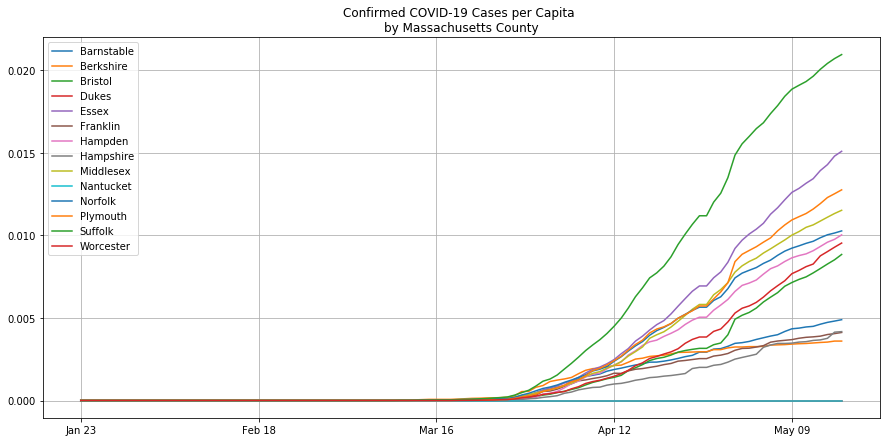

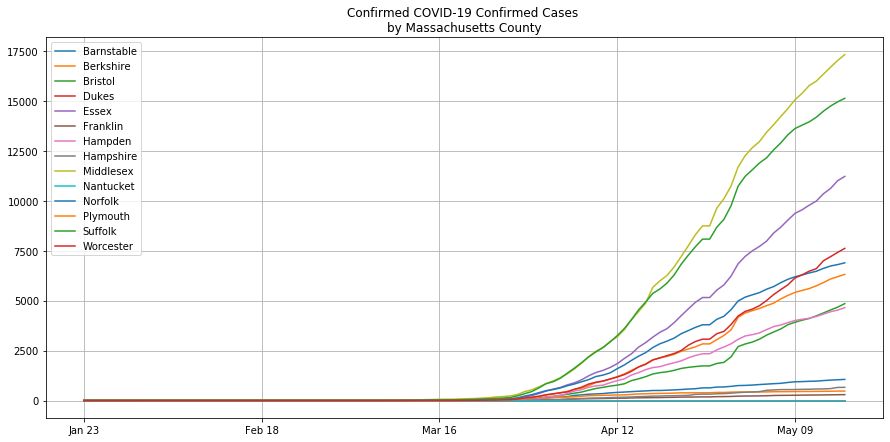

In [23]:
if __name__ == "__main__":
    main()